In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score


## **Load the dataset**

To download the CSV file from Google Drive, use the wget command with the correct link. Then, load the CSV into pandas using pd.read_csv() to work with the data.

In [ ]:
# prompt: read the csv file from the link  https://drive.google.com/file/d/1kiZ-8bXM4bSvqPVj0OUoY3OQCClVlYwe/view?usp=drive_link

import pandas as pd

# Download the CSV file from Google Drive
!wget --no-check-certificate 'https://drive.google.com/drive/u/2/my-drive' -O dataset.csv

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("Error: '/content/drive/MyDrive/dataset.csv' not found. Please ensure the file was downloaded correctly.")
except pd.errors.ParserError:
    print("Error: Could not parse '/content/drive/MyDrive/dataset.csv'. Check if it is a valid CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--2025-01-09 04:59:15--  https://drive.google.com/drive/u/2/my-drive
Resolving drive.google.com (drive.google.com)... 142.250.31.101, 142.250.31.139, 142.250.31.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/u/2/my-drive&followup=https://drive.google.com/drive/u/2/my-drive [following]
--2025-01-09 04:59:15--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/u/2/my-drive&followup=https://drive.google.com/drive/u/2/my-drive
Resolving accounts.google.com (accounts.google.com)... 142.250.31.84, 2607:f8b0:4004:c07::54
Connecting to accounts.google.com (accounts.google.com)|142.250.31.84|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/InteractiveLo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Show the dataset**

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


### **Data Exploration**

In [ ]:
df.shape

(3000, 16)

**Ploting Lung Cancer against related factors**

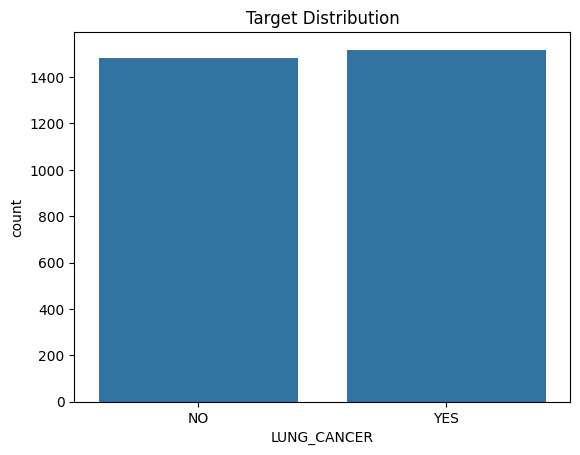

In [ ]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [ ]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,1518
NO,1482


In [ ]:
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

**Gender VS Lung Cancer**

<Axes: xlabel='GENDER'>

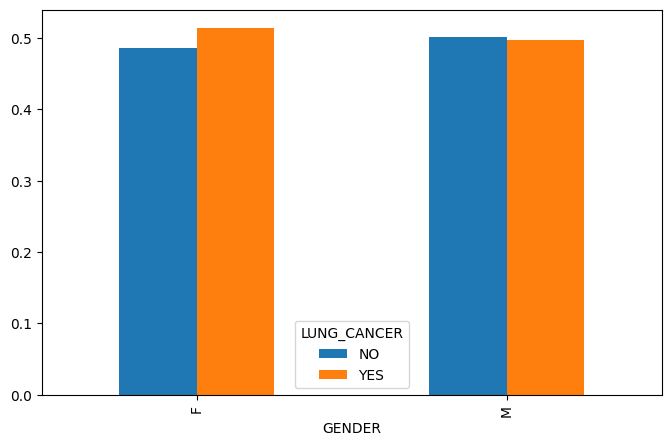

In [ ]:
plot('GENDER')

**Age VS Lung Cancer**

<Axes: xlabel='AGE'>

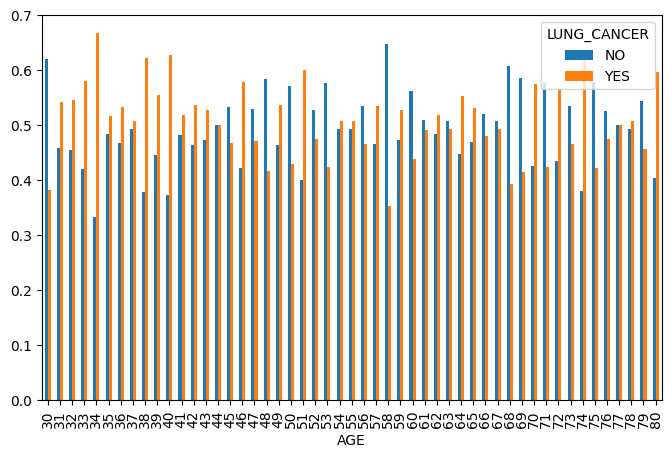

In [ ]:
plot('AGE')

**Smoking VS Lung Cancer**

<Axes: xlabel='SMOKING'>

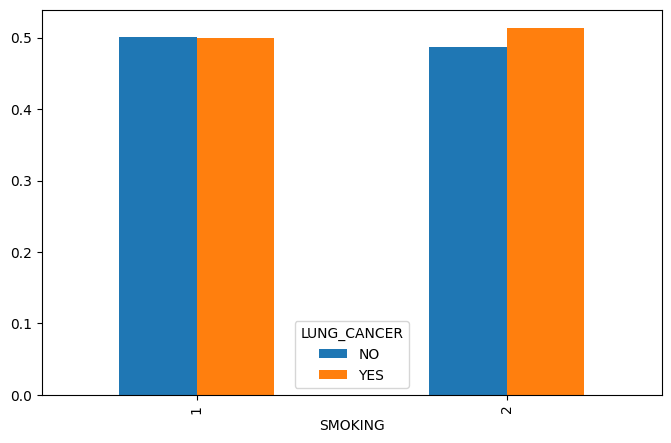

In [ ]:
plot('SMOKING')

               AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min           1.000000     1

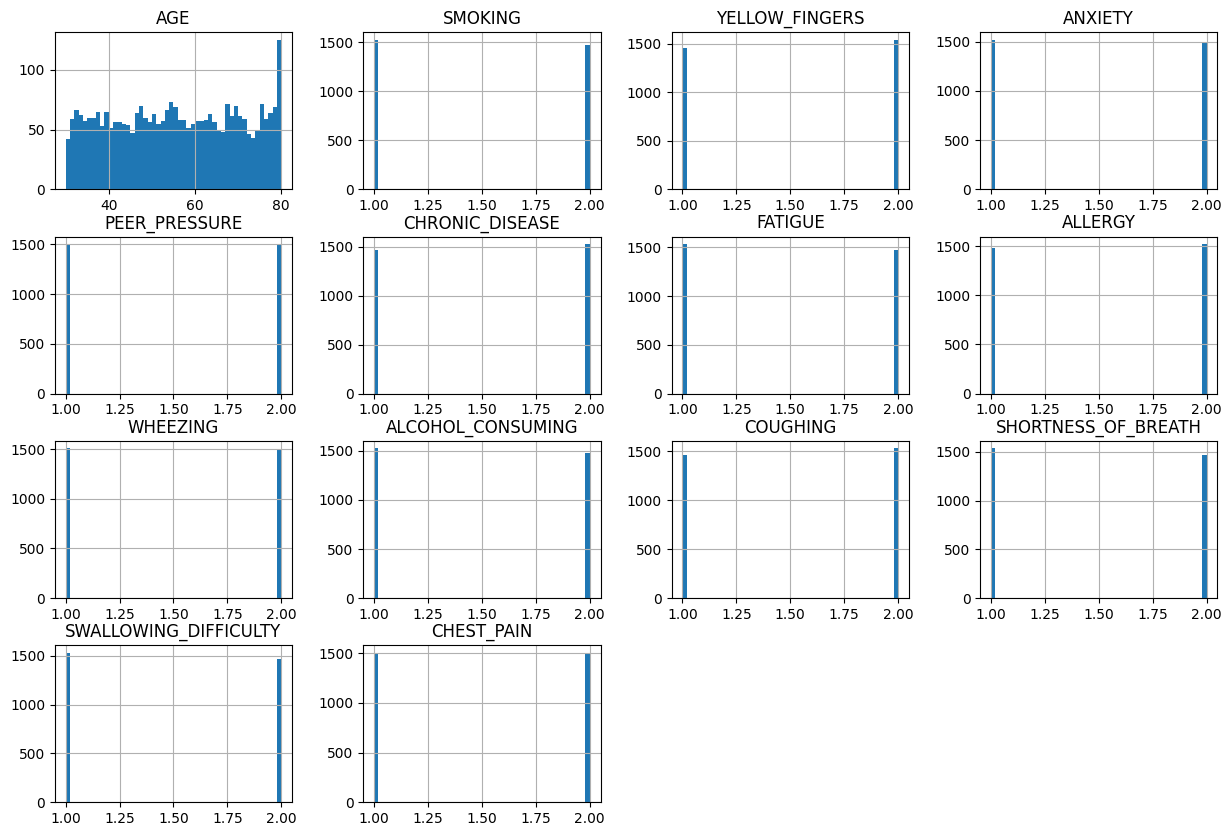

In [ ]:
# Summary statistics
print(df.describe())

# Check for missing values
df.isnull().sum()

# Visualize distributions
df.hist(bins=50, figsize=(15,10))
plt.show()

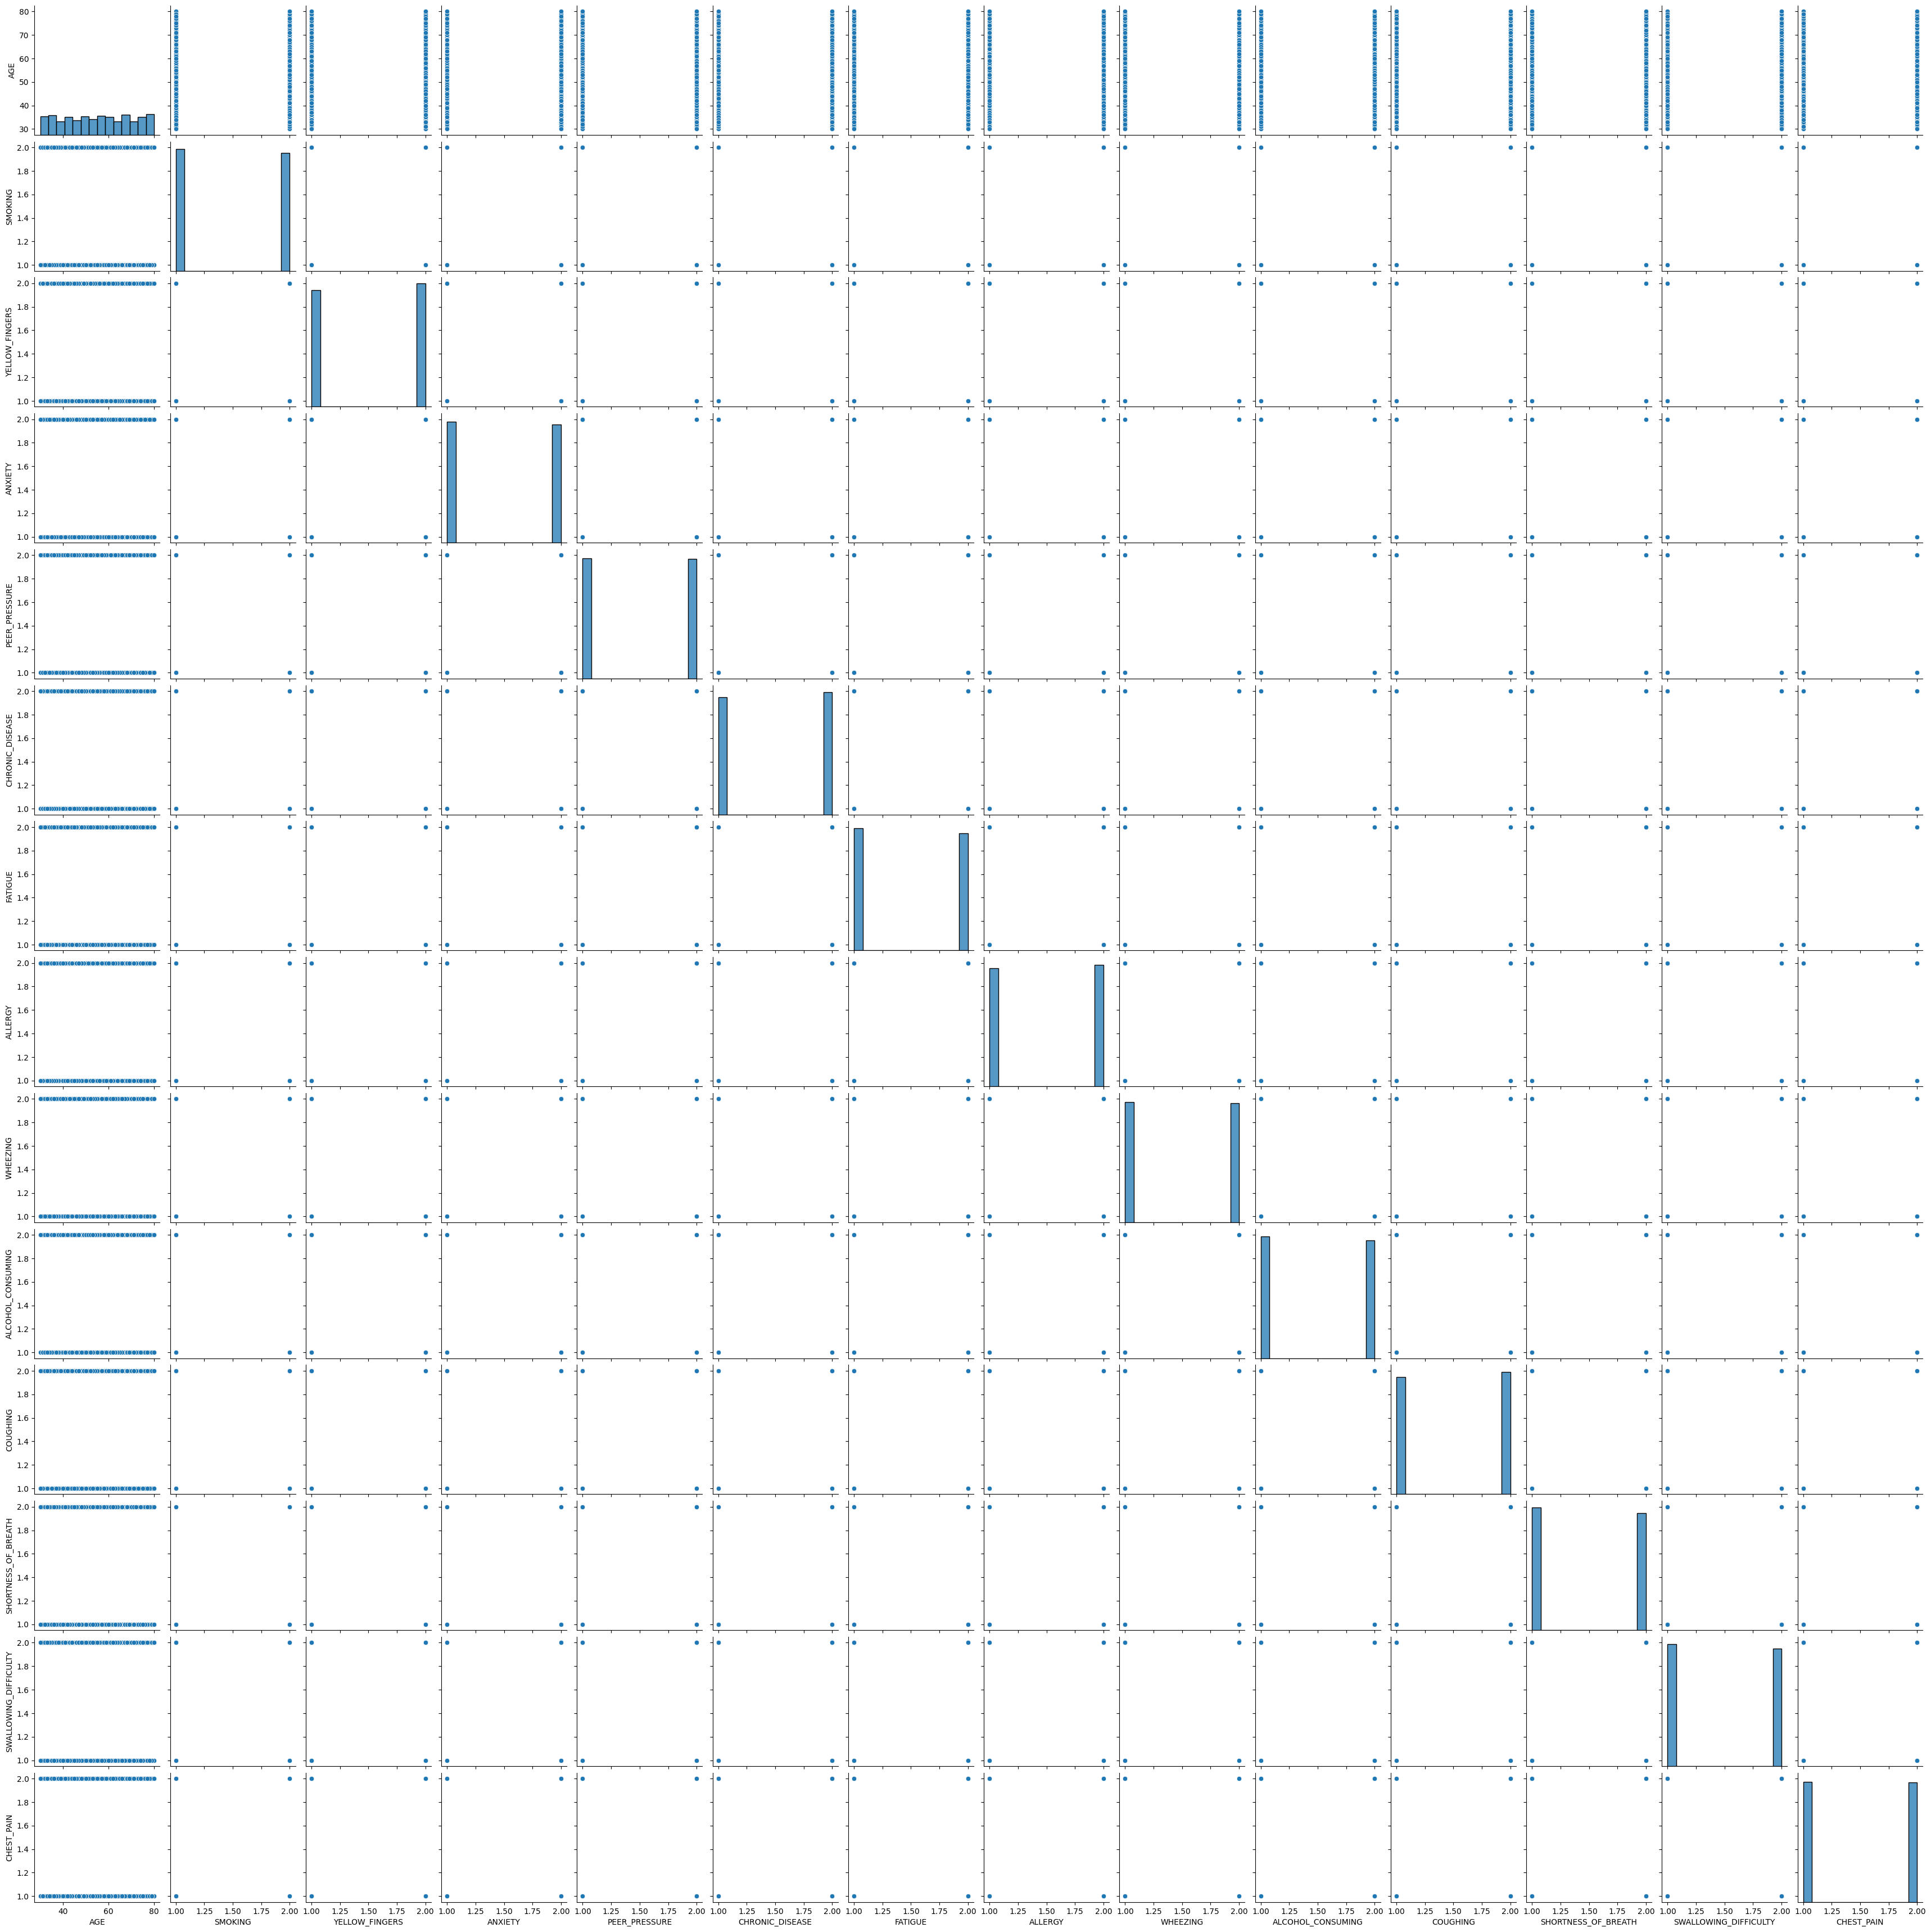

In [ ]:
sns.pairplot(df)

# **Visualize Relationships**

The code encodes categorical variables (GENDER and LUNG_CANCER) into numeric values, mapping 'M' to 1 and 'F' to 0 for GENDER, and 'YES' to 1 and 'NO' to 0 for LUNG_CANCER. It then calculates the correlation matrix of the encoded DataFrame and visualizes it using a heatmap with annotations to display the relationships between variables in the dataset.

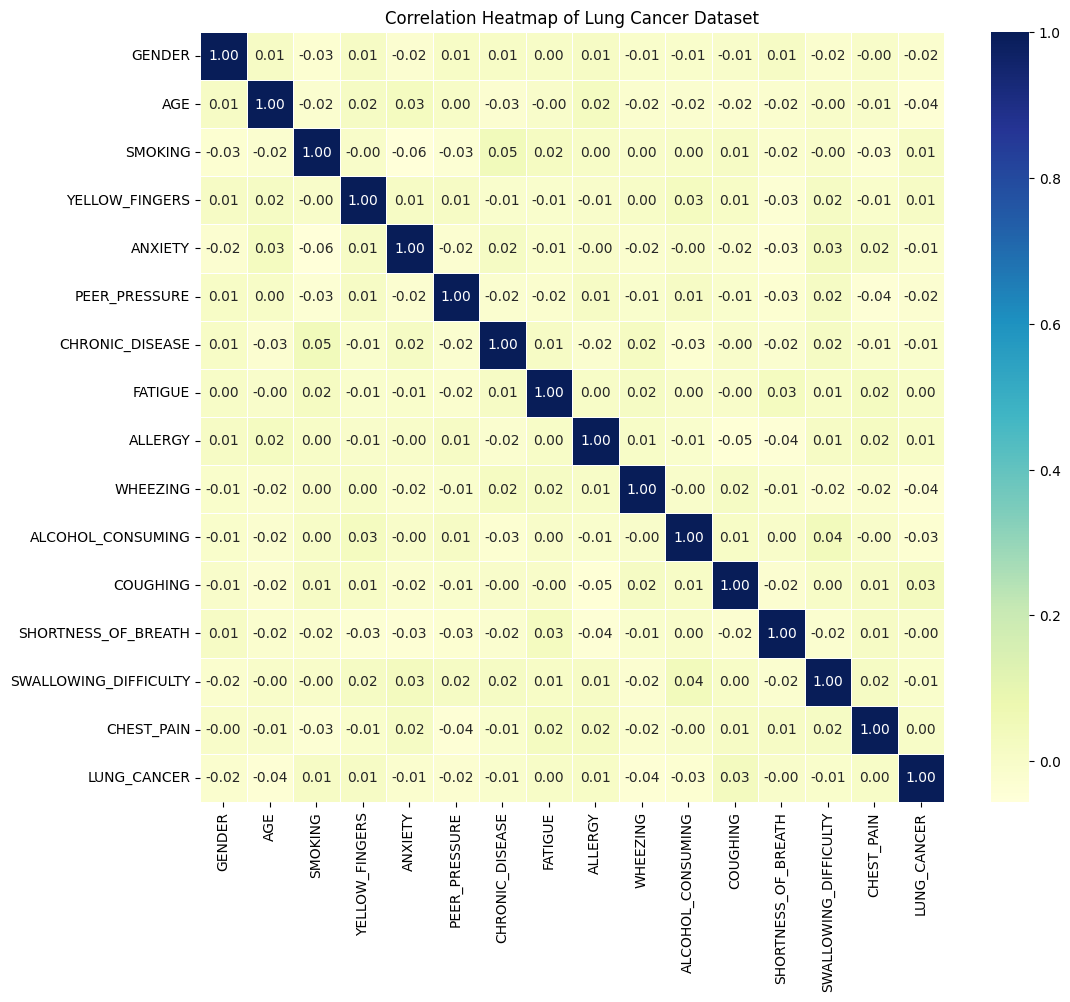

In [ ]:
df_encoded = df.copy()
df_encoded['GENDER'] = df_encoded['GENDER'].map({'M': 1, 'F': 0})  # Encode GENDER as 1 for Male, 0 for Female
df_encoded['LUNG_CANCER'] = df_encoded['LUNG_CANCER'].map({'YES': 1, 'NO': 0})  # Encode LUNG_CANCER as 1 for Yes, 0 for No
correlation_matrix = df_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Lung Cancer Dataset')
plt.show()

## **Data Preprocessing**

The code uses LabelEncoder from sklearn.preprocessing to convert categorical columns (listed in col_to_encode) into numeric values. It iterates through each column, applying fit_transform to encode the categories as integers, which is useful for machine learning models that require numerical input.

In [ ]:
le = preprocessing.LabelEncoder()
col_to_encode = ['GENDER', 'LUNG_CANCER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                     'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                     'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
for cols in col_to_encode:
    df[cols] = le.fit_transform(df[cols])

### **Model Selection and Training**

In the Model training process, we feed data into the machine learning algorithms to help the model "learn" the relationships between the input features and the target variable. During training, the algorithm adjusts its parameters based on the data, enabling it to make predictions. **Here Random forest model performs best for our dataset.**


In [ ]:
X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [ ]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

**Logistic Regression**

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(xr_train,yr_train)
yrl_predict = lr_model.predict(xr_test)

print("classification ")
print(classification_report(yr_test, yrl_predict))

print("accuracy score = ", accuracy_score(yr_test, yrl_predict))

classification 
              precision    recall  f1-score   support

           0       0.49      0.64      0.55        36
           1       0.63      0.48      0.54        46

    accuracy                           0.55        82
   macro avg       0.56      0.56      0.55        82
weighted avg       0.57      0.55      0.55        82

accuracy score =  0.5487804878048781


Highest Accuracy in Logistic  regression is 63%

**Random Forest**

In [ ]:
sm_rf = SMOTEENN()
Xrf_resampled, yrf_resampled = sm_rf.fit_resample(X, y)
xrrf_train,xrrf_test,yrrf_train,yrrf_test=train_test_split(Xrf_resampled, yrf_resampled,test_size=0.2)
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=101)
rf_model.fit(xrrf_train, yrrf_train)

RandomForestClassifier(random_state=101)

In [ ]:
yrf_pred = rf_model.predict(xrrf_test)
accuracyrf = accuracy_score(yrrf_test, yrf_pred)
print(f"Accuracy: {accuracyrf}")

print("Classification Report:")
print(classification_report(yrrf_test, yrf_pred))

Accuracy: 0.7790697674418605
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.88      0.71      0.79        49

    accuracy                           0.78        86
   macro avg       0.79      0.79      0.78        86
weighted avg       0.80      0.78      0.78        86



Highest accuracy in Random forest model is 82%

**Decision tree**

In [ ]:
dtc = DecisionTreeClassifier(random_state=101)  # You can customize the hyperparameters
dtc.fit(xr_train, yr_train)

DecisionTreeClassifier(random_state=101)

In [ ]:
y_dtc_pred = dtc.predict(xr_test)

# Evaluate the model's performance
accuracy_dtc = accuracy_score(yr_test, y_dtc_pred)
print("Classification Report:")
print(classification_report(yr_test, y_dtc_pred))
print(f"Decision Tree Accuracy: {accuracy_dtc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.72      0.72      0.72        46

    accuracy                           0.68        82
   macro avg       0.68      0.68      0.68        82
weighted avg       0.68      0.68      0.68        82

Decision Tree Accuracy: 0.6829268292682927


Highest accuracy in Decission tree is 73%

**K Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(xr_train, yr_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_knn_pred = knn.predict(xr_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(yr_test, y_knn_pred)
print("Classification Report:")
print(classification_report(yr_test, y_knn_pred))
print(f"KNN Model Accuracy: {accuracy_knn}")

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68        36
           1       0.75      0.72      0.73        46

    accuracy                           0.71        82
   macro avg       0.70      0.71      0.70        82
weighted avg       0.71      0.71      0.71        82

KNN Model Accuracy: 0.7073170731707317


Highest accuracy in KNN model is 73%

# **Accuracy comparison**

The code calculates the accuracy scores of four classifiers (Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbor) and stores them in a list (score). It then uses matplotlib to create a horizontal bar chart, displaying the accuracy percentages of each classifier for comparison.

In [ ]:
LR_score = (accuracy_score(yr_test, yrl_predict)*100)
DTC_score =  (accuracy_score(yr_test, y_dtc_pred)*100)
RF_score =  (accuracy_score(yrrf_test, yrf_pred)*100)
KNN_score =  (accuracy_score(yr_test, y_knn_pred)*100)

In [ ]:
score = [LR_score,DTC_score,RF_score,KNN_score]
classifier = ('Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[54.87804878048781, 68.29268292682927, 77.90697674418605, 70.73170731707317]


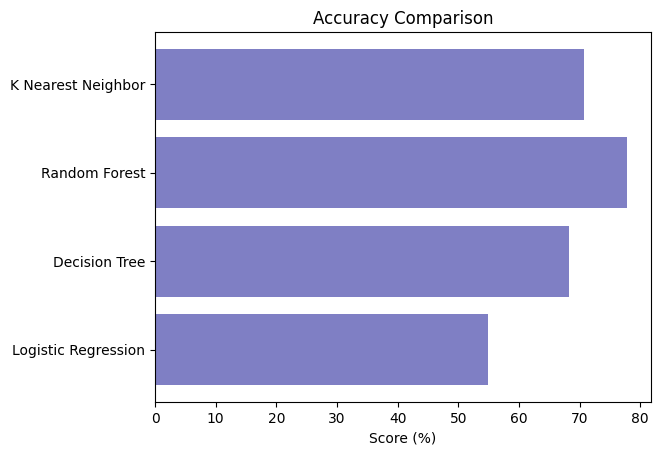

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='darkblue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score (%)')
plt2.title('Accuracy Comparison')
plt2.show()

# **Fine-Tune the Model**
# Hypermeter Tuning


The code performs hyperparameter tuning for both Decision Tree and K-Nearest Neighbors (KNN) classifiers using GridSearchCV. For the Decision Tree, the grid search tests different values for max_depth and min_samples_split, while for KNN, it explores variations in n_neighbors and weights. After fitting the models on the training data, it identifies the best parameters for each classifier and evaluates their performance on the test set. The accuracy and classification report for both the Decision Tree and KNN models are then printed.

In [ ]:
# Define the parameter grid for Decision Tree
param_grid = [
    {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
]

# Initialize the Decision Tree model
dtc = DecisionTreeClassifier(random_state=101)

# Perform GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(xr_train, yr_train)

# Display the best parameters
print("Best Parameters for Decision Tree:", grid_search.best_params_)

# Evaluate the best model on the test set
best_dtc = grid_search.best_estimator_
y_dtc_pred = best_dtc.predict(xr_test)
accuracy_dtc = accuracy_score(yr_test, y_dtc_pred)
print("Classification Report for Decision Tree:")
print(classification_report(yr_test, y_dtc_pred))
print(f"Decision Tree Accuracy: {accuracy_dtc}")

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        36
           1       0.67      0.70      0.68        46

    accuracy                           0.63        82
   macro avg       0.63      0.63      0.63        82
weighted avg       0.63      0.63      0.63        82

Decision Tree Accuracy: 0.6341463414634146


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Define the parameter grid for KNN
param_grid = [
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
]

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(xr_train, yr_train)

# Display the best parameters
print("Best Parameters for KNN:", grid_search.best_params_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_knn_pred = best_knn.predict(xr_test)
accuracy_knn = accuracy_score(yr_test, y_knn_pred)
print("Classification Report for KNN:")
print(classification_report(yr_test, y_knn_pred))
print(f"KNN Model Accuracy: {accuracy_knn}")

Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        36
           1       0.84      0.70      0.76        46

    accuracy                           0.76        82
   macro avg       0.76      0.76      0.76        82
weighted avg       0.77      0.76      0.76        82

KNN Model Accuracy: 0.7560975609756098


After hyper tuning KNN accuracy is 77%




# **Model Evaluation**

The code evaluates the best K-Nearest Neighbors (KNN) model from the GridSearchCV on the test set. It calculates the accuracy score and prints the classification report, which includes precision, recall, and F1-score. It then visualizes the confusion matrix using a heatmap to show the true positives, false positives, true negatives, and false negatives. Additionally, it creates a scatter plot comparing the actual and predicted values for LUNG_CANCER to visually assess model performance.

### ***KNN***

Test Accuracy: 0.7560975609756098

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        36
           1       0.84      0.70      0.76        46

    accuracy                           0.76        82
   macro avg       0.76      0.76      0.76        82
weighted avg       0.77      0.76      0.76        82



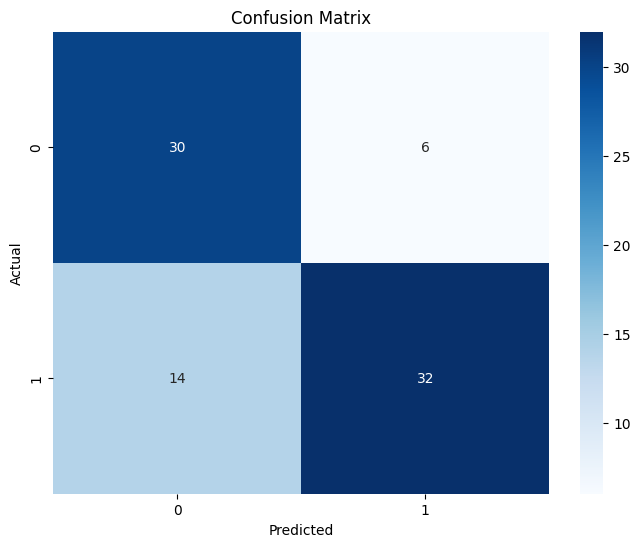

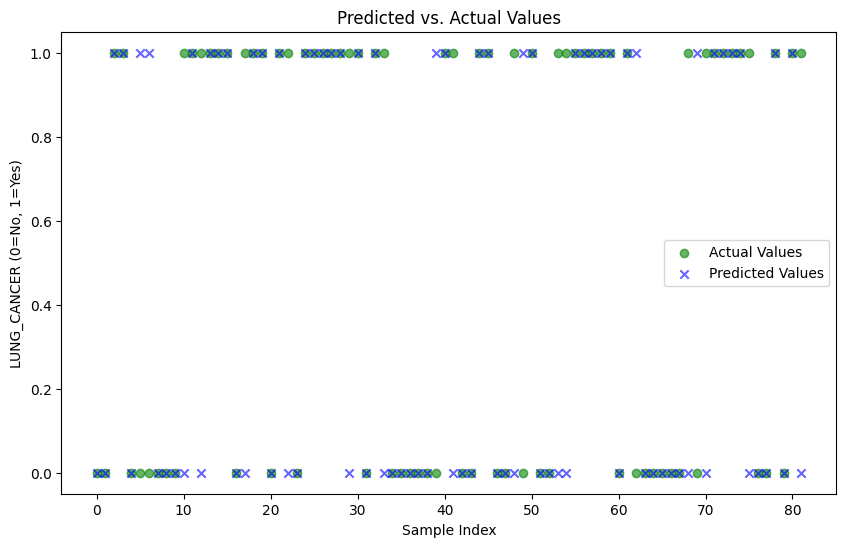

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Evaluate the final model on the test set
final_model = grid_search.best_estimator_

# Make predictions on the test set
y_knn_pred= final_model.predict(xr_test)

# Calculate accuracy
test_accuracy = accuracy_score(yr_test, y_knn_pred)
print("Test Accuracy:", test_accuracy)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(yr_test, y_knn_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(yr_test, y_knn_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.scatter(range(len(yr_test)), yr_test, color='green', alpha=0.6, label='Actual Values', marker='o')
plt.scatter(range(len(y_knn_pred)), y_knn_pred, color='blue', alpha=0.6, label='Predicted Values', marker='x')

# Add labels, title, and legend
plt.xlabel("Sample Index")
plt.ylabel("LUNG_CANCER (0=No, 1=Yes)")
plt.title("Predicted vs. Actual Values")
plt.legend()
plt.show()


# **Feature Importance Plot**

Feature importance in Random Forest helps understand which features have the most impact on predictions.


The code visualizes feature importance for three different models: Random Forest, Decision Tree, and K-Nearest Neighbors (KNN). For Random Forest and Decision Tree, it extracts the feature importances from the trained models and displays them using bar plots, sorted by importance score. For KNN, it calculates permutation importance by evaluating the change in model accuracy when each feature is randomly shuffled, and visualizes it using a horizontal bar plot. This helps identify which features most influence the model's predictions.

<ipython-input-155-1d73e83931f0>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


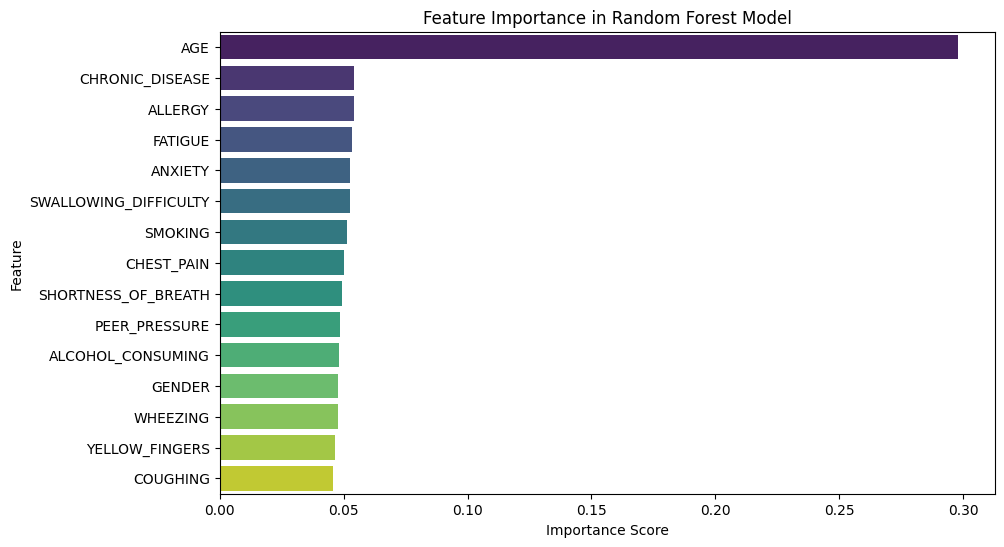

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Example: Ensure the data is split into training and test sets
# Replace X and y with your actual dataset and target variable
from sklearn.model_selection import train_test_split
xr_train, xr_test, yr_train, yr_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(xr_train, yr_train)

# Extract feature importances from the Random Forest model
feature_importances = final_model.feature_importances_
features = xr_train.columns  # Column names of the features

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



**Feature importance in Decision Tree  helps understand which features have the most impact on predictions**

<ipython-input-156-097e4bec6054>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="coolwarm")


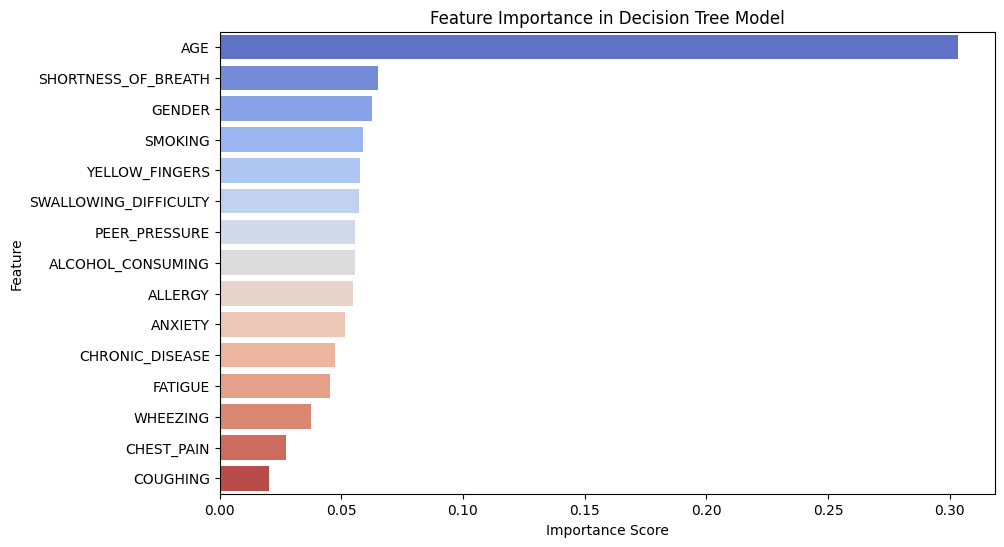

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Example: Ensure the data is split into training and test sets
# Replace X and y with your actual dataset and target variable
from sklearn.model_selection import train_test_split
xr_train, xr_test, yr_train, yr_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
final_model = DecisionTreeClassifier(random_state=42)
final_model.fit(xr_train, yr_train)

# Extract feature importances from the Decision Tree model
feature_importances = final_model.feature_importances_
features = xr_train.columns  # Column names of the features

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="coolwarm")
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



**Feature importance in KNN model helps understand which features have the most impact on predictions**

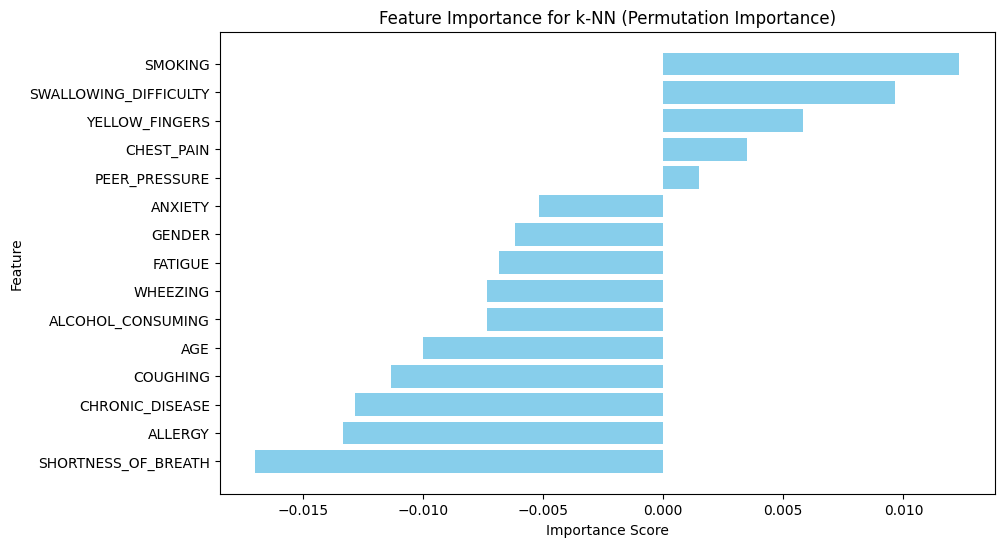

In [ ]:
# Example: Ensure the data is split into training and test sets
# Replace with your actual dataset and preprocessing steps
# Example dataset placeholders
xr_train, xr_test, yr_train, yr_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the model is trained
final_model = KNeighborsClassifier(n_neighbors=5)  # Replace with the best KNN model if tuned
final_model.fit(xr_train, yr_train)

# Compute permutation importance
perm_importance = permutation_importance(final_model, xr_test, yr_test, scoring='accuracy', n_repeats=10, random_state=42)

# Create a DataFrame to visualize permutation importance
importance_df = pd.DataFrame({
    'Feature': xr_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance for k-NN (Permutation Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



# **Interface for testing the model with any data**






The code defines an interactive function predict_lung_cancer() that allows users to input values for various features related to lung cancer. It then processes the input, converting categorical variables like GENDER into numerical values and scaling the data using StandardScaler. The function then uses a trained model (final_model) to make a prediction, outputting whether the user is predicted to have lung cancer (YES or NO). This provides a simple interface to predict lung cancer risk based on user inputs.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming the final model has been trained and is available as `final_model`

# Define a function to make predictions using the model
def predict_lung_cancer():
    """
    Interactive function to predict lung cancer based on user input.
    """
    print("Please provide the following details to predict the likelihood of lung cancer:")

    # Input for each feature
    GENDER = input("Gender (M/F): ").strip().upper()
    AGE = int(input("Age (e.g., 65): "))
    SMOKING = int(input("Smoking (1 for Yes, 2 for No): "))
    YELLOW_FINGERS = int(input("Yellow Fingers (1 for Yes, 2 for No): "))
    ANXIETY = int(input("Anxiety (1 for Yes, 2 for No): "))
    PEER_PRESSURE = int(input("Peer Pressure (1 for Yes, 2 for No): "))
    CHRONIC_DISEASE = int(input("Chronic Disease (1 for Yes, 2 for No): "))
    FATIGUE = int(input("Fatigue (1 for Yes, 2 for No): "))
    ALLERGY = int(input("Allergy (1 for Yes, 2 for No): "))
    WHEEZING = int(input("Wheezing (1 for Yes, 2 for No): "))
    ALCOHOL_CONSUMING = int(input("Alcohol Consuming (1 for Yes, 2 for No): "))
    COUGHING = int(input("Coughing (1 for Yes, 2 for No): "))
    SHORTNESS_OF_BREATH = int(input("Shortness of Breath (1 for Yes, 2 for No): "))
    SWALLOWING_DIFFICULTY = int(input("Swallowing Difficulty (1 for Yes, 2 for No): "))
    CHEST_PAIN = int(input("Chest Pain (1 for Yes, 2 for No): "))

    # Convert gender to numerical (M=1, F=0)
    GENDER = 1 if GENDER == 'M' else 0

    # Prepare the data in the same order as the training dataset
    user_data = np.array([[GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE,
                           CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING,
                           COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN]])

    # Assuming you have a scaler for preprocessing
    # Load the same scaler used during training
    scaler = StandardScaler()  # Replace with the actual scaler instance used in training
    user_data_scaled = scaler.fit_transform(user_data)  # Fit with training data in practice

    # Make prediction
    prediction = final_model.predict(user_data_scaled)

    # Show the result
    result = "YES" if prediction[0] == 1 else "NO"
    print(f"The prediction for lung cancer is: {result}")

# Call the function
predict_lung_cancer()


Please provide the following details to predict the likelihood of lung cancer:
Gender (M/F): M
Age (e.g., 65): 60
Smoking (1 for Yes, 2 for No): 2
Yellow Fingers (1 for Yes, 2 for No): 1
Anxiety (1 for Yes, 2 for No): 1
Peer Pressure (1 for Yes, 2 for No): 1
Chronic Disease (1 for Yes, 2 for No): 1
Fatigue (1 for Yes, 2 for No): 1
Allergy (1 for Yes, 2 for No): 1
Wheezing (1 for Yes, 2 for No): 2
Alcohol Consuming (1 for Yes, 2 for No): 2
Coughing (1 for Yes, 2 for No): 2
Shortness of Breath (1 for Yes, 2 for No): 2
Swallowing Difficulty (1 for Yes, 2 for No): 2
Chest Pain (1 for Yes, 2 for No): 2
The prediction for lung cancer is: NO


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
